In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
fname='player_attributes.csv'

In [3]:
pl=pd.read_csv(fname)

In [4]:
p=pl.copy()

In [20]:
p.loc['mean']=pl.mean()

In [28]:
pl['Attack']=pl.loc[:,['Crossing','Finishing','Heading Accuracy','Short Passing','Volleys']].mean(1)
pl['Skill']=pl.loc[:,['Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control']].mean(1)
pl['Movement']=pl.loc[:,['Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance']].mean(1)
pl['Power']=pl.loc[:,['Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots']].mean(1)
pl['Mentality']=pl.loc[:,['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure']].mean(1)
pl['Defending']=pl.loc[:,['Marking', 'Standing Tackle', 'Sliding Tackle']].mean(1)
pl['Goalkeeping']=pl.loc[:,[ 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']].mean(1)
pl['Attacking+Skill']=pl.loc[:,['Attacking','Skill']].mean(1)

C:\Users\z\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [29]:
ph=pl['Height'].tolist()
ph=[i.strip('""').split('\'') for i in ph]
ph=np.array([round((int(i[0])*12+int(i[1]))*2.54/100,2) for i in ph])
pl['H/m']=ph
pw=pl['Weight'].values*0.4535924
BMI=np.around(pw/ph**2,2)
pl['BMI']=BMI


In [30]:
plp=pl.groupby('Player Category')
sp=plp.get_group('Striker')
gp=plp.get_group('GoalKeeper')
mp=plp.get_group('Midfielder')
dp=plp.get_group('Defender')
sp['Mentality']=sp.loc[:,['Aggression', 'Positioning', 'Vision', 'Penalties', 'Composure']].mean(1)
dp['Mentality']=dp.loc[:,['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Composure']].mean(1)

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [31]:
sph=sp.groupby('H/m').mean()
spw=sp.groupby('Weight').mean()
spB=sp.groupby('BMI').mean()
gph=gp.groupby('H/m').mean()
gpw=gp.groupby('Weight').mean()
gpB=gp.groupby('BMI').mean()
mph=mp.groupby('H/m').mean()
mpw=mp.groupby('Weight').mean()
mpB=mp.groupby('BMI').mean()
dph=dp.groupby('H/m').mean()
dpw=dp.groupby('Weight').mean()
dpB=dp.groupby('BMI').mean()

In [45]:
def draw4(sph,mph,dph):
    x1=sph.index
    x2=mph.index
    x3=dph.index
    itl=['Movement','Attacking+Skill','Defending','Power','Mentality']
    xname=sph.index.name
    for i in range(5):
        y1=sph[itl[i]]
        y2=mph[itl[i]]
        y3=dph[itl[i]]
        plt.plot(x1,y1,x2,y2,x3,y3)
        plt.xlabel(xname)
        plt.ylabel(itl[i])
        plt.title(itl[i]+' vs '+xname)
        plt.grid(True)
        plt.legend([ 'Striker', 'Midfielder','Defender'])
        plt.show()
    

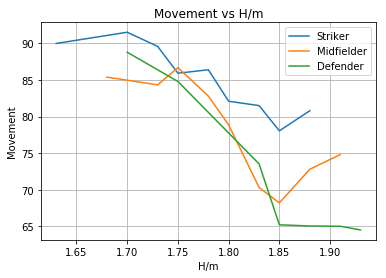

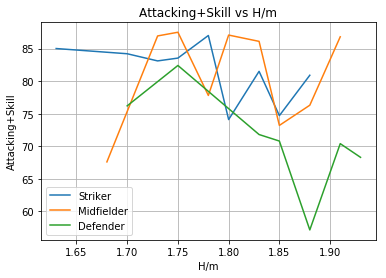

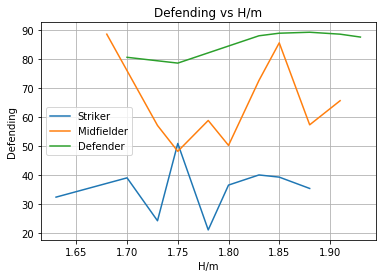

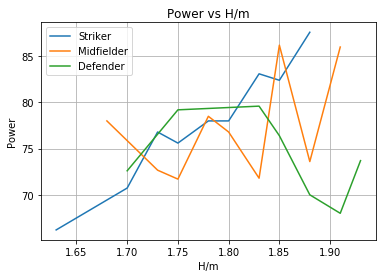

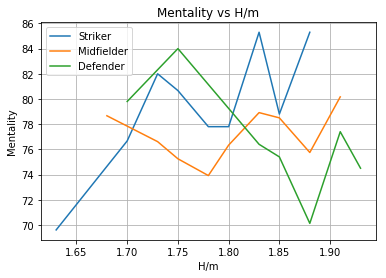

In [46]:
draw4(sph,mph,dph)

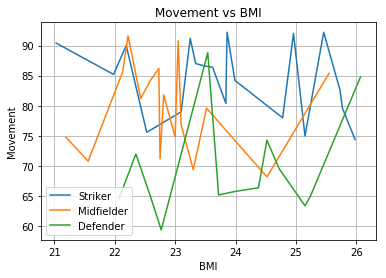

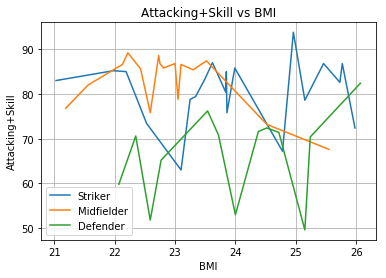

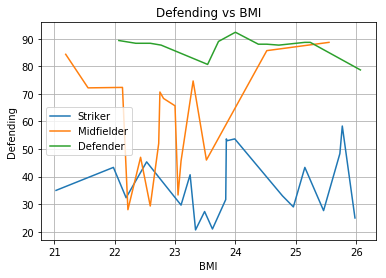

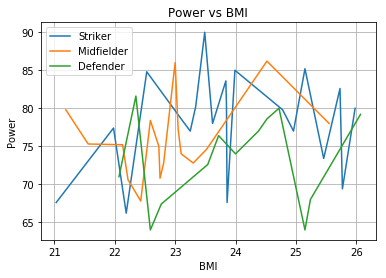

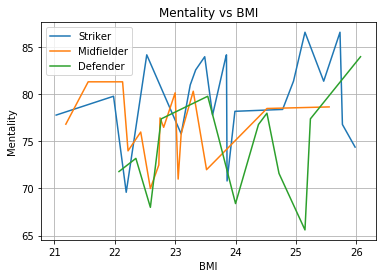

In [47]:
draw4(spB,mpB,dpB)

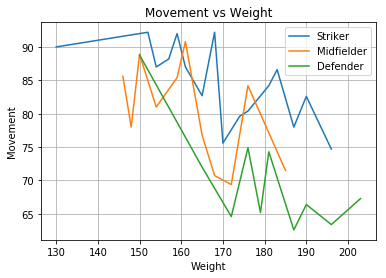

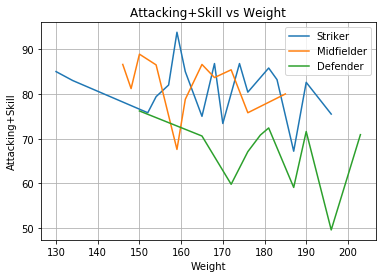

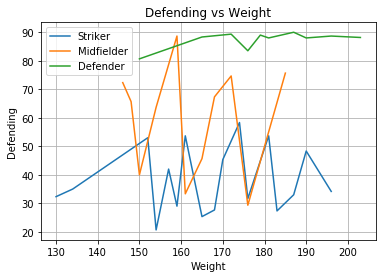

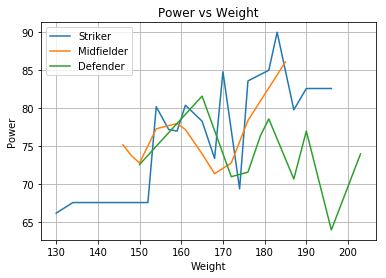

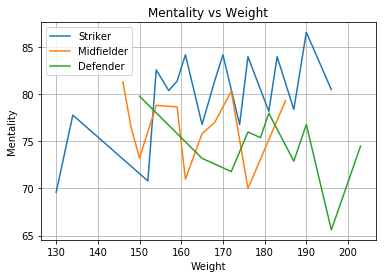

In [48]:
draw4(spw,mpw,dpw)

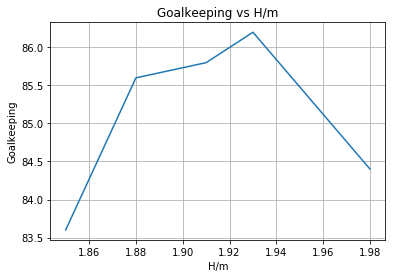

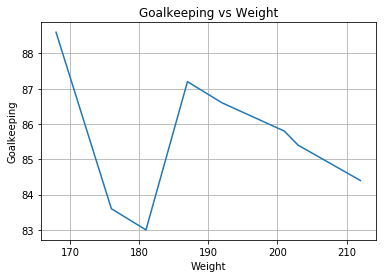

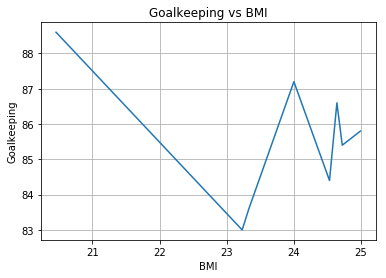

In [59]:

x=[gph,gpw,gpB]
y=gph['Goalkeeping']
for i in range(3):
    plt.plot(x[i].index,x[i]['Goalkeeping'])
    plt.xlabel(x[i].index.name)
    plt.ylabel('Goalkeeping')
    plt.title('Goalkeeping'+' vs '+x[i].index.name)
    plt.grid(True)
    plt.show()

In [61]:
spa=sp['Attack']
gpa=gp['Attack']
mpa=mp['Attack']
dpa=dp['Attack']
sps=sp['Skill']
gps=gp['Skill']
mps=mp['Skill']
dps=dp['Skill']
spp=sp['Power']
gpp=gp['Power']
mpp=mp['Power']
dpp=dp['Power']
spe=sp['Mentality']
gpe=gp['Mentality']
mpe=mp['Mentality']
dpe=dp['Mentality']
gpg=gp['Goalkeeping']

In [62]:
bins = np.arange(3,99,3)

In [66]:
def bap(da,ma,sa,xlb,ttext):
    x=pd.concat([da,ma,sa])
    bins = np.arange(x.min(),x.max(),2)
    x1 = np.linspace(x.min(), x.max(), 1000)
    normal = mlab.normpdf(x1, x.mean(), x.std())*x.count()*2
    kde = mlab.GaussianKDE(x)
    p1=plt.hist([da,ma,sa], bins = bins,rwidth=0.8,edgecolor = 'k',stacked= True,label=['Defender','Midfielder','Striker'])
    plt.plot(x1,kde(x1)*x.count()*2,linewidth = 3,label='Kernel density')
    plt.plot(x1,normal,label='Normal distribution',linewidth = 3)
    plt.grid(True)
    plt.xlabel(xlb)
    plt.ylabel('Number of players')
    plt.legend()
    plt.title(ttext)



In [67]:
def bapl(da,ma,sa,ga,xlb,ttext):
    x=pd.concat([da,ma,sa,ga])
    bins = np.arange(x.min(),x.max(),2)
    x1 = np.linspace(x.min(), x.max(), 1000)
    normal = mlab.normpdf(x1, x.mean(), x.std())*x.count()*2
    kde = mlab.GaussianKDE(x)
    p1=plt.hist([da,ma,sa,ga], bins = bins,rwidth=0.8,edgecolor = 'k',stacked= True,label=['Defender','Midfielder','Striker','GoalKeeper'])
    plt.plot(x1,kde(x1)*x.count()*2,linewidth = 3,label='Kernel density')
    plt.plot(x1,normal,label='Normal distribution',linewidth = 3)
    plt.grid(True)
    plt.xlabel(xlb)
    plt.ylabel('Number of players')
    plt.legend()
    plt.title(ttext)

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


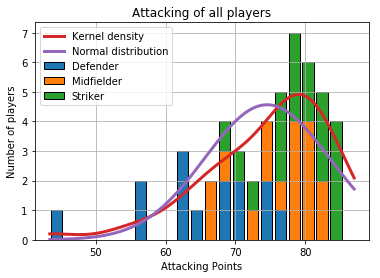

In [68]:
bap(dpa,mpa,spa,'Attacking Points','Attacking of all players')

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


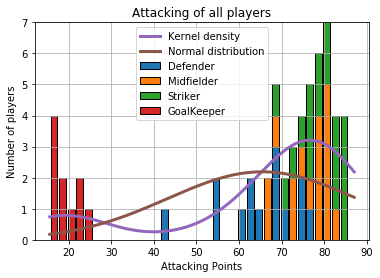

In [70]:
bapl(dpa,mpa,spa,gpa,'Attacking Points','Attacking of all players')

In [71]:
def curv(x,ttext,xt):
    x1 = np.linspace(x.min(), x.max(), 1000)
    normal = mlab.normpdf(x1, x.mean(), x.std())*x.count()*2
    kde = mlab.GaussianKDE(x)
    plt.hist(x, bins = np.arange(x.min(),x.max(),2), edgecolor = 'k')
    plt.plot(x1,normal,'r-',x1,kde(x1)*x.count()*2,'y-',linewidth = 3)
    plt.legend([ 'Normal distribution', 'Kernel density'],loc= 'best')
    plt.title(ttext)
    plt.grid(True)
    plt.xlabel(xt)
    plt.ylabel('Number of players')
    

In [73]:
def nbap(ttext,xlb,sa,ma,da):
    pal=pd.concat([sa,ma,da])
    al = np.linspace(pal.min(), pal.max(), 1000)
    san = mlab.normpdf(al, sa.mean(), sa.std())*sa.count()
    man = mlab.normpdf(al, ma.mean(), ma.std())*ma.count()
    dan = mlab.normpdf(al, da.mean(), da.std())*da.count()    
    plt.plot(al,san,al,man,al,dan,linewidth = 2)
    mh=max(san.tolist()+man.tolist()+dan.tolist())
    plt.vlines(pal.mean(),0,mh+2, 'k')
    plt.legend([ 'Striker','Midfielder','Defender','Mean'],loc= 'best')
    plt.title(ttext)
    plt.xlabel(xlb)
    plt.grid(True)
    plt.ylabel('Player numbers')


C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  after removing the cwd from sys.path.
C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """
C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


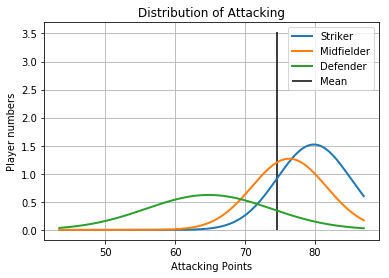

In [74]:
nbap('Distribution of Attacking','Attacking Points',spa,mpa,dpa)

In [ ]:
nbap('Distribution of Power','Power Points',sp,mp,dp)

In [ ]:
nbap('Distribution of Skill','Skill Points',ss,ms,ds)

In [ ]:
nbap('Distribution of Defending','Defending Points',sd,md,dd)

In [ ]:
nbap('Distribution of Mentality','Mentalityg Points',se,me,de)